In [1]:
# Reference: https://gist.github.com/gergf/acd8e3fd23347cb9e6dc572f00c63d79
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Define the root directory containing the warped annotated images
root_dir = "../data/outputs/baseline_registration"

# Load the annotated atlas
atlas_path = "../data/outputs/atlas/atlas.nii.gz"
annotated_atlas = nib.load(atlas_path)


In [3]:
def calculate_dice_score(image_path, annotated_atlas):
    # Load the image data
    image = nib.load(image_path).get_fdata()

    # Convert image and atlas data to binary masks
    image_mask = np.zeros_like(image)
    image_mask[image > 0] = 1

    atlas_mask = np.zeros_like(annotated_atlas.get_fdata())
    atlas_mask[annotated_atlas.get_fdata() > 0] = 1

    # Calculate the DICE score
    intersection = np.logical_and(image_mask, atlas_mask)
    dice_score = (2 * intersection.sum()) / (image_mask.sum() + atlas_mask.sum())
    
    precision = intersection.sum() / image_mask.sum()
    recall = intersection.sum() / atlas_mask.sum()
    
    return dice_score, atlas_mask.mean(),precision, recall

In [4]:
import pandas as pd

# Create an empty list to store the results
results = []

# Calculate the DICE score for all the brains
for i in range(10):
    subdir = f"test_output_{i}"
    subdir_path = os.path.join(root_dir, subdir)

    for file in os.listdir(subdir_path):
        # Check if the file is a warped annotated image file
        if file.endswith("_warped_annotation_imageSpace.nii"):
            # Construct the full file path
            warped_annotation_path = os.path.join(subdir_path, file)

            # Calculate the DICE score
            dice_score, _, precision, recall = calculate_dice_score(warped_annotation_path, annotated_atlas)

            # Extract the relevant part of the file name
            warped_annotation_name = file.split("_warped_annotation_imageSpace.nii")[0]

            # Append the results to the list
            results.append([warped_annotation_name, dice_score, precision, recall])

# Create a DataFrame from the results list
df = pd.DataFrame(results, columns=["Brain Image", "DICE Score", "Precision", "Recall"])

# Print the DataFrame
print(df)


  Brain Image  DICE Score  Precision    Recall
0    brain_01    0.868814   0.863622  0.874068
1    brain_02    0.874407   0.905376  0.845487
2    brain_04    0.884905   0.838756  0.936429
3    brain_05    0.880411   0.857779  0.904270
4    brain_06    0.843910   0.886569  0.805168
5    brain_07    0.904778   0.917553  0.892353
6    brain_08    0.851167   0.810760  0.895813
7    brain_09    0.858512   0.927420  0.799136


/home/umii/kanex161/.conda/envs/lab2im_registration/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)


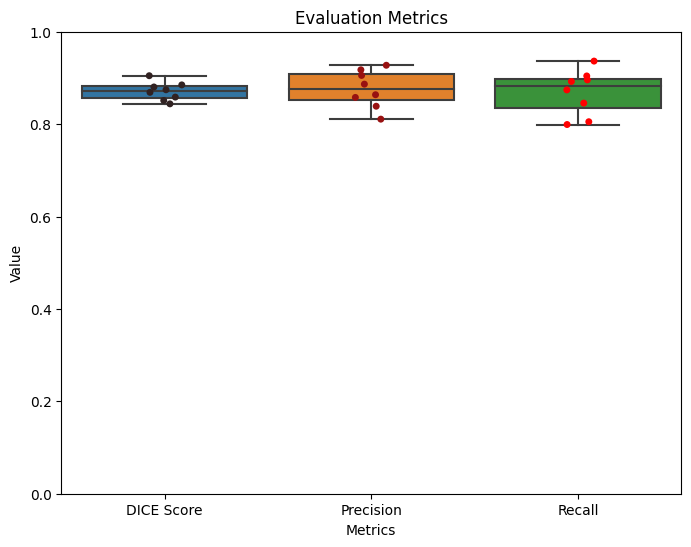

In [9]:
import seaborn as sns
# Create a box plot with individual points
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
sns.stripplot(data=df, color="red", alpha=1)

plt.title("Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Value")
#plt.xticks(range(len(x_values)), x_values)  # Set x-axis tick labels
plt.ylim(0, 1)
plt.show()


In [ ]:
import pandas as pd

# Calculate mean and standard deviation for DICE Score
dice_mean = df["DICE Score"].mean()
dice_std = df["DICE Score"].std()

# Calculate mean and standard deviation for Precision
precision_mean = df["Precision"].mean()
precision_std = df["Precision"].std()

# Calculate mean and standard deviation for Recall
recall_mean = df["Recall"].mean()
recall_std = df["Recall"].std()

# Print mean and standard deviation for each metric
print("DICE Score:")
print(f"Mean: {dice_mean}")
print(f"Standard Deviation: {dice_std}")

print("\nPrecision:")
print(f"Mean: {precision_mean}")
print(f"Standard Deviation: {precision_std}")

print("\nRecall:")
print(f"Mean: {recall_mean}")
print(f"Standard Deviation: {recall_std}")
